IRIS FLOWER CLARIFICATION

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data = pd.read_csv("Downloads/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [8]:
data.size

900

In [9]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data.drop(columns = 'Id',axis = 0,inplace = True)

In [11]:
data_split = data.Species.str.split('-',n=-1,expand = True)
data_split.drop(columns = 0,axis = 1, inplace = True)

In [12]:
data_split

,1
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [13]:
data_full = data.join(data_split)
data_full

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [14]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [16]:
data_full.rename({1:'Short_form'},axis = 1,inplace = True)
data_full

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Short_form
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [18]:
data_full.drop(columns = 'Species',axis = 1,inplace = True)
data_full

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Short_form
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
data_full.shape

(150, 5)

In [20]:
data_full.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Short_form
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [21]:
data_full.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Short_form       0
dtype: int64

In [23]:
data_full.Short_form.value_counts()

Short_form
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: >

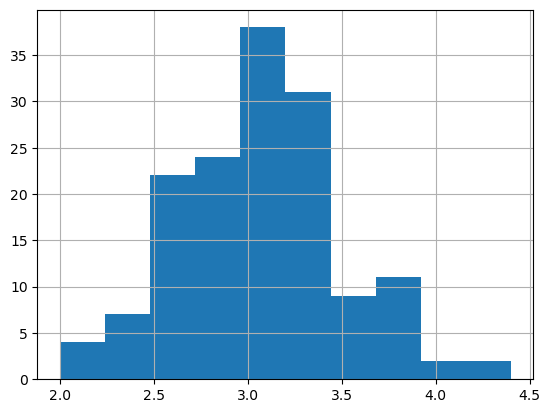

In [25]:
data['SepalWidthCm'].hist()

<Axes: >

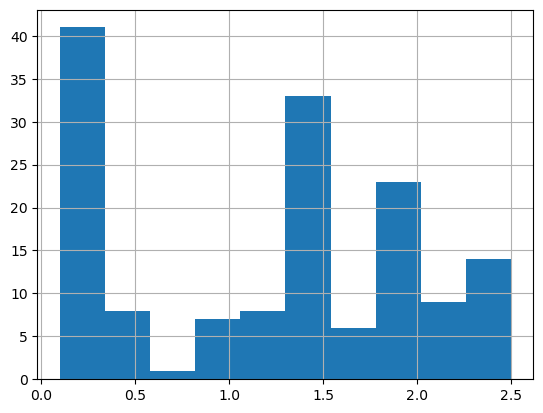

In [26]:
data['PetalWidthCm'].hist()

In [27]:
colors = ['red','blue','black']
species = ['setosa','versicolor','virginica']

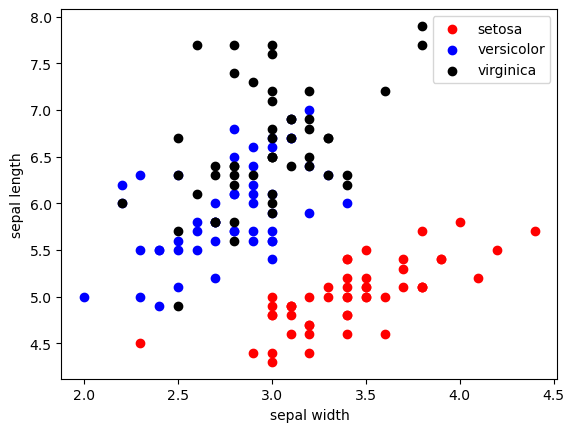

In [32]:
for i in range(3):
    x = data_full[data_full['Short_form'] == species[i]]
    plt.scatter(x['SepalWidthCm'],x['SepalLengthCm'],c = colors[i],label = species[i])
    plt.xlabel("sepal width")
    plt.ylabel("sepal length")
    plt.legend()

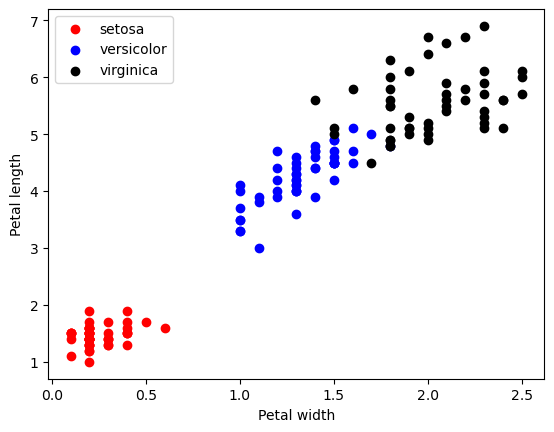

In [33]:
for i in range(3):
    x = data_full[data_full['Short_form'] == species[i]]
    plt.scatter(x['PetalWidthCm'],x['PetalLengthCm'],c = colors[i],label = species[i])
    plt.xlabel("Petal width")
    plt.ylabel("Petal length")
    plt.legend()

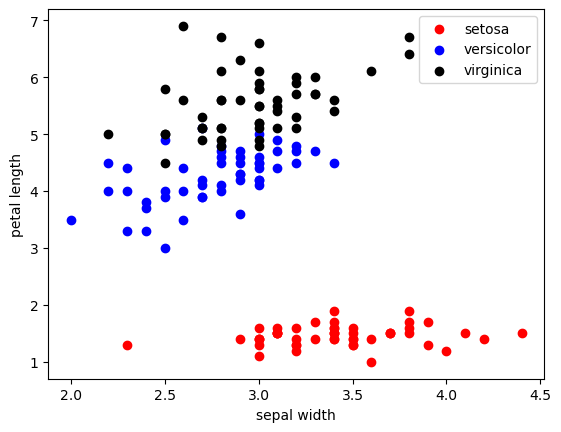

In [34]:
for i in range(3):
    x = data_full[data_full['Short_form'] == species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalLengthCm'],c = colors[i],label = species[i])
    plt.xlabel("sepal width")
    plt.ylabel("petal length")
    plt.legend()

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
data['Species'] = le.fit_transform(data['Species'])
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = data_full.drop(columns=['Short_form'])
y = data_full['Short_form']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [62]:
print("Accuracy:",model.score(x_test,y_test))

Accuracy: 1.0


In [57]:
from sklearn.neighbors import KNeighborsClass

In [58]:
model = KNeighborsClassifier()

In [59]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [60]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
model =DecisionTreeClassifier()

In [67]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
print("Accuracy:",model.score(x_test,y_test)*100)


Accuracy: 100.0


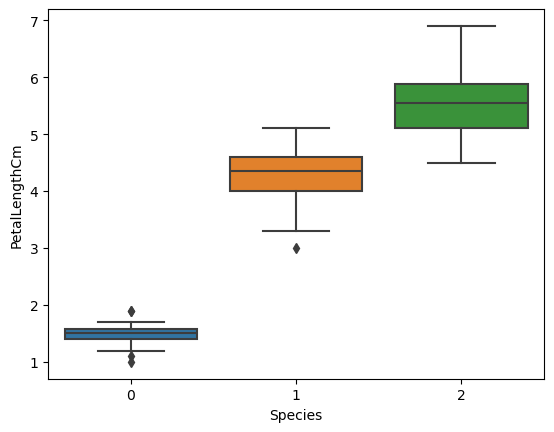

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correct column names
sns.boxplot(x="Species", y="PetalLengthCm", data=data)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

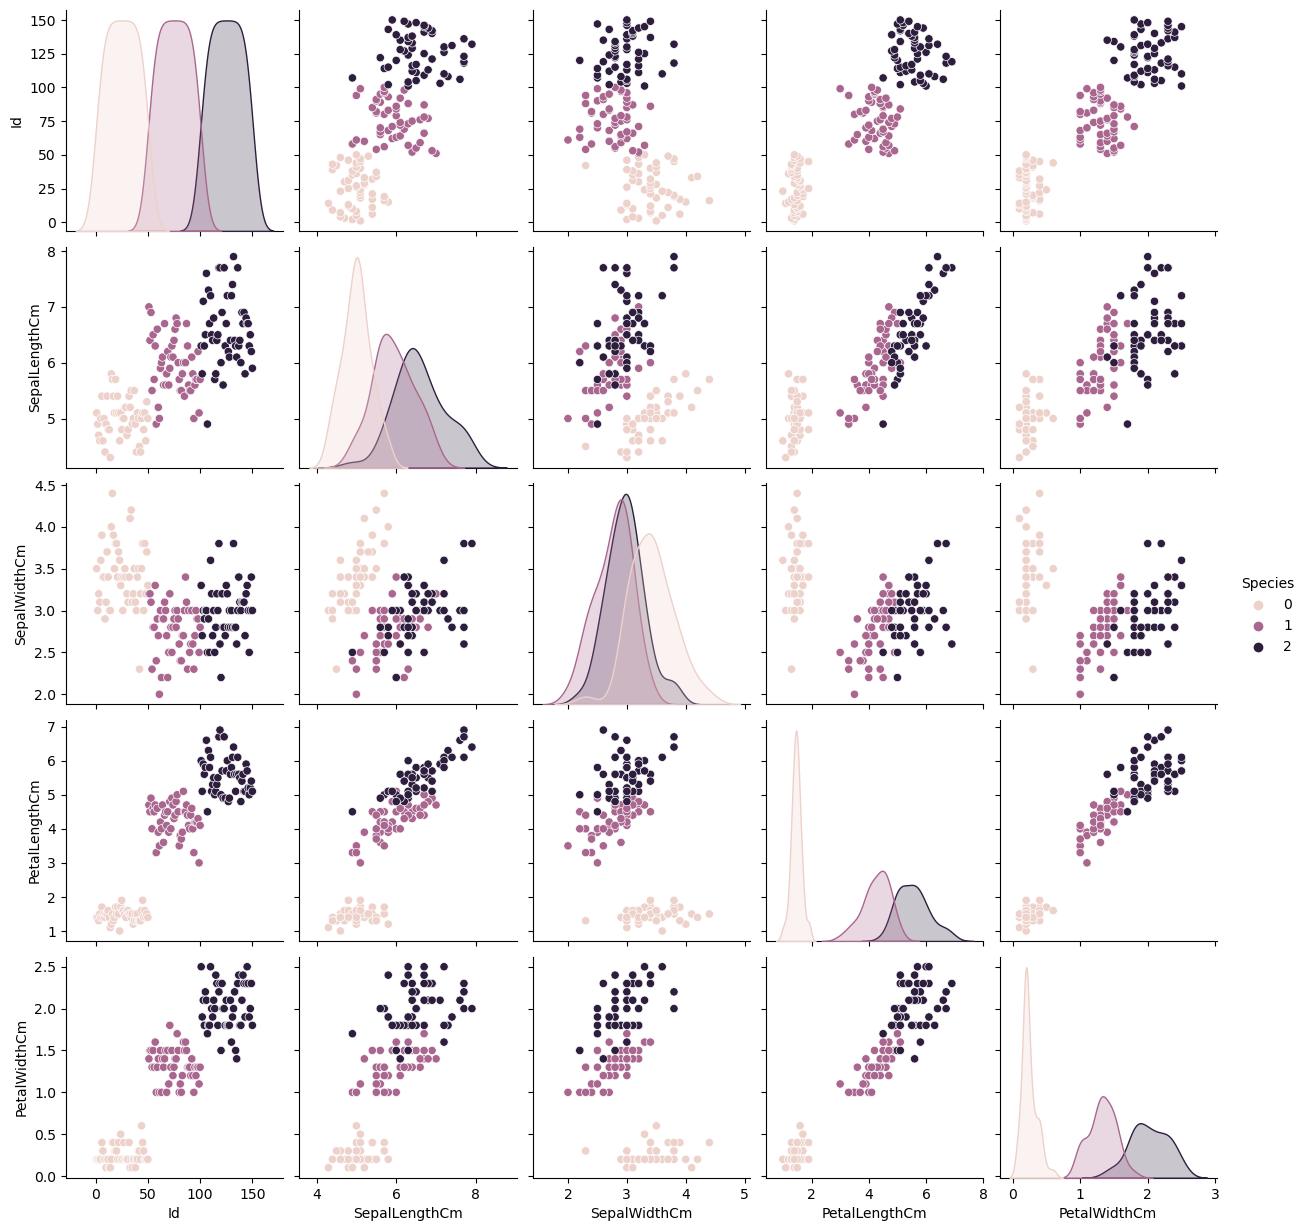

In [75]:
sns.pairplot(data,hue='Species')

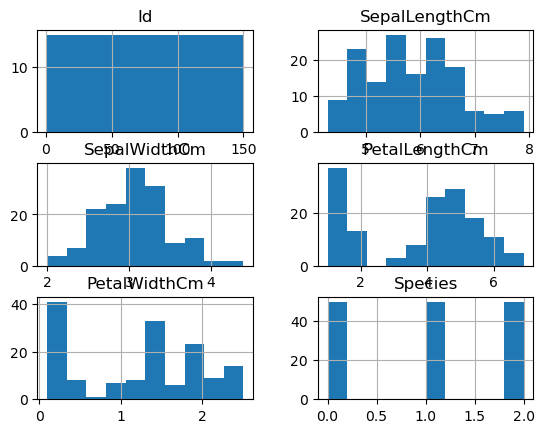

In [76]:
data.hist()
plt.show()

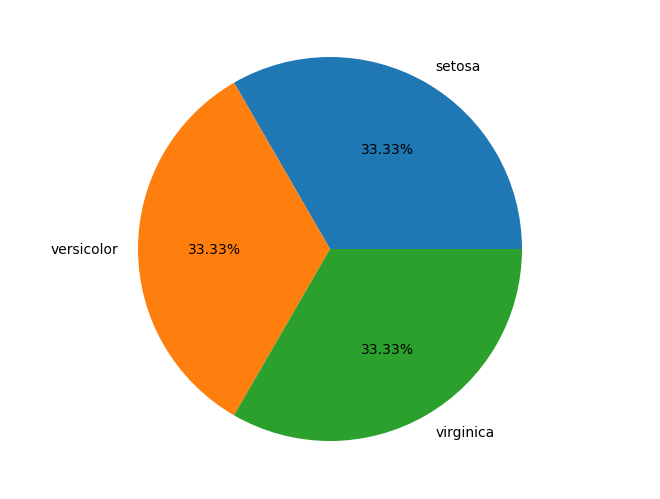

In [77]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l =  ['setosa','versicolor','virginica']
s = [50,50,50]
ax.pie(s,labels = l,autopct = '%1.2f%%')
plt.show()

In [78]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

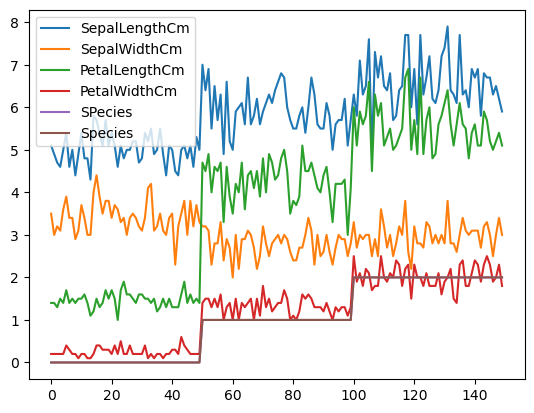

In [80]:
data_full.plot()

<Axes: >

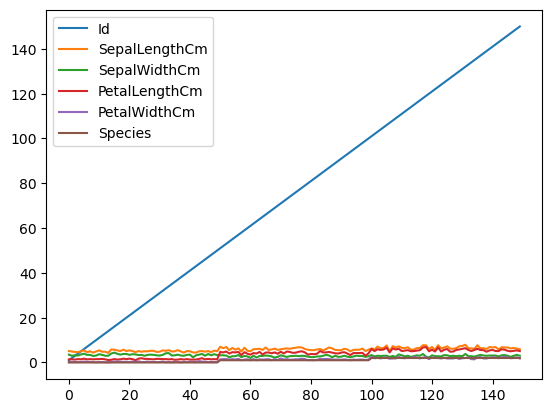

In [81]:
data.plot()

(array([[ 14.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  16.],
        [150.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [150.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [150.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [150.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [150.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.]),
 <a list of 6 BarContainer objects>)

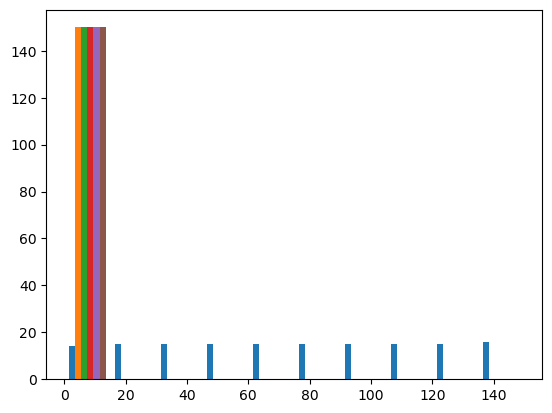

In [86]:
plt.hist(data)